# Parte 1

- Carregar áudio
- Visualizar espectro de frequência do áudio (FFT)
    - Esse espectro de frequência é dado pela Densidade Espectral de Potência (PSD)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


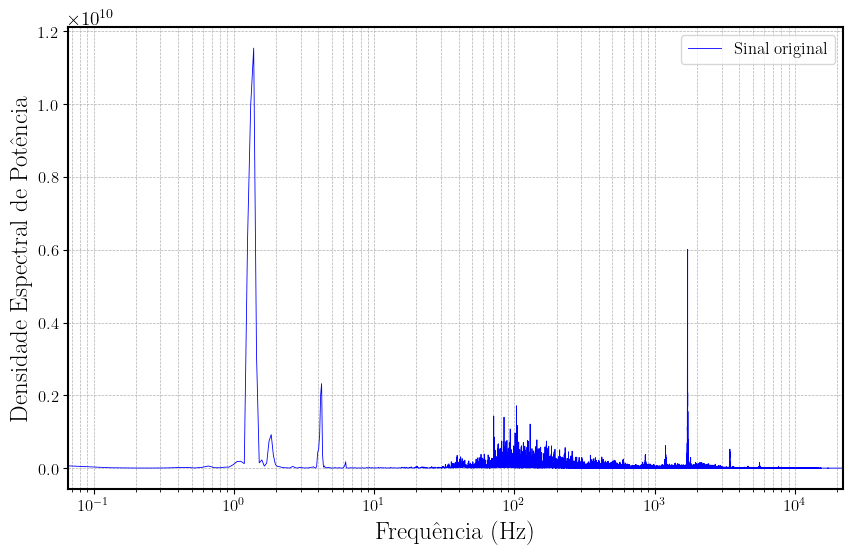

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import matplotlib as mpl

# Define as configurações de fonte para usar LaTeX
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.5

# Carregar áudio
fs, data = wavfile.read('steam_train.wav')
# Como o áudio é estéreo, vamos pegar apenas um canal
data = data[:, 0]

n = len(data)
f_hat = np.fft.fft(data)
# Frequências de 0 até a frequência de amostragem
freqs = np.linspace(0, fs, n, endpoint=False)
# Densidade Espectral de Potência (PSD)
sxx = np.abs(f_hat)**2 / n
# Apenas a primeira metade das frequências
l = np.arange(1, n // 2, dtype='int')

# Plotar o PSD
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogx(freqs[l], sxx[l], linewidth=0.6, label='Sinal original', color='blue')
ax.set_xlim(freqs[l[0]], freqs[l[-1]])
ax.set_xlabel('Frequência (Hz)')
ax.set_ylabel('Densidade Espectral de Potência')
ax.grid(True, which='both', linewidth=0.5, linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper right', fontsize=12)

# Salvar figura em SVG ou EPS
plt.savefig('psd_plot.svg', format='svg')
plt.savefig('psd_plot.eps', format='eps')

# Exibir a figura
plt.show()


In [2]:
# Tocar o áudio
from IPython.display import Audio
Audio(data, rate=fs)

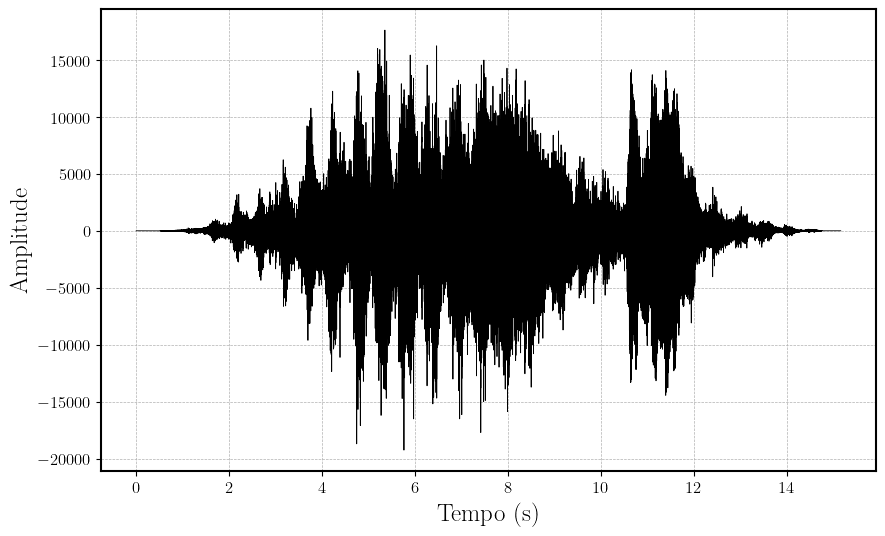

In [37]:
# plotar áudio
t = np.linspace(0, n / fs, n)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, data, linewidth=0.6, label='Sinal original', color='black')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude')
ax.grid(True, which='both', linewidth=0.5, linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=12)
# Salvar como eps
plt.savefig('audio_plot.eps', format='eps')


# Parte 2

Agora, vamos adicionar um ruído gaussiano ao áudio e ver como o espectro de frequência muda.

Vamos alterar a proporção do ruído usando o parâmetro SNR (Signal-to-Noise Ratio).

In [3]:
def noise_std(snr_db, signal):
    """Calcula o desvio padrão do ruído para um dado sinal e SNR em decibéis.
    
    Parameters
    ----------
    snr_db : float
        Relação sinal-ruído em dB.
    signal : ndarray
        Sinal de referência.
    
    Returns
    -------
    float
        Desvio padrão do ruído.
    """
    snr = 10**(snr_db / 10)
    return np.std(signal) / np.sqrt(snr)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


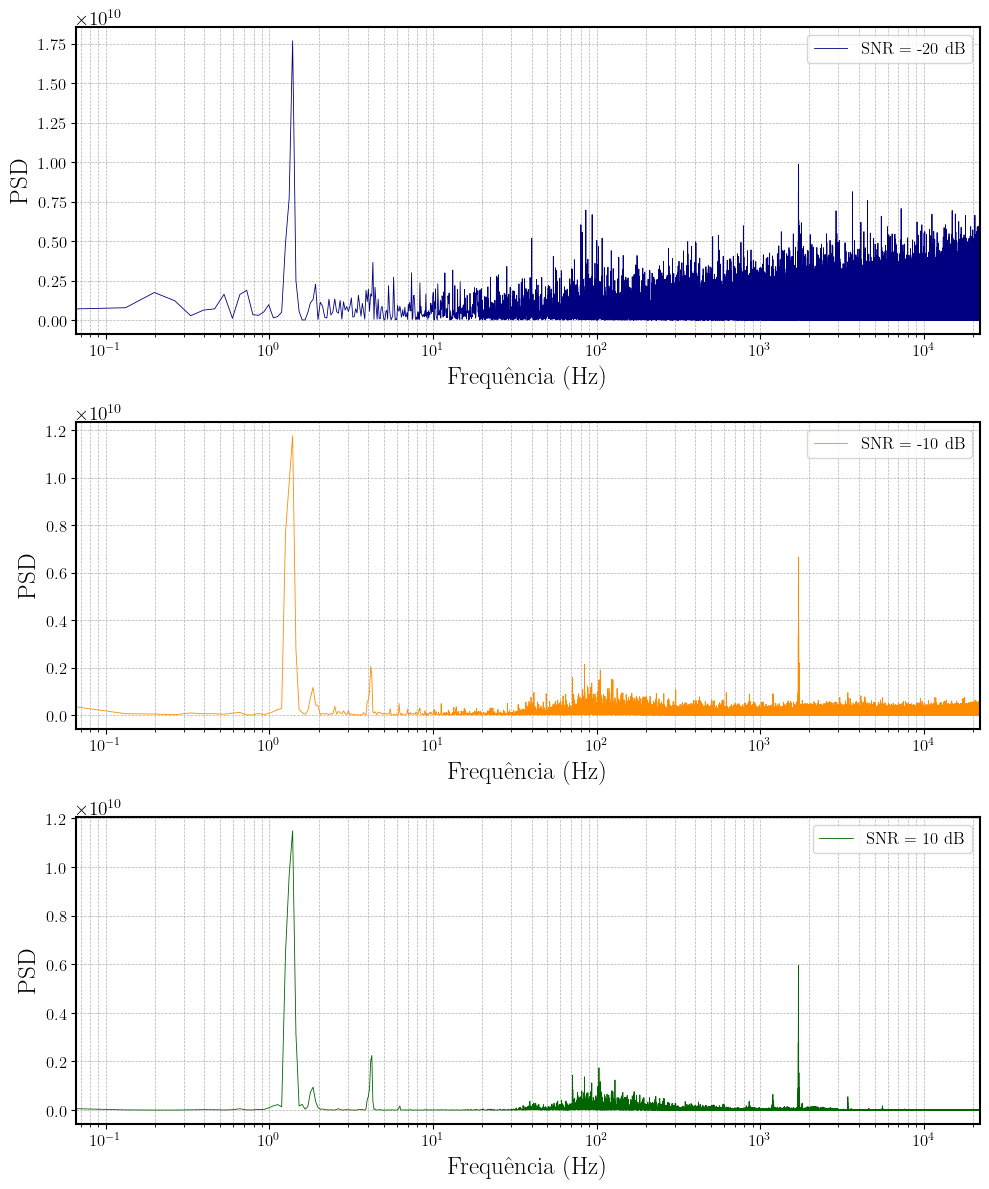

In [44]:
# função parametrizada pelo SNR
def add_noise(signal, snr_db):
    """Adiciona ruído branco ao sinal.
    
    Parameters
    ----------
    signal : ndarray
        Sinal de referência.
    snr_db : float
        Relação sinal-ruído em dB.
    
    Returns
    -------
    ndarray
        Sinal com ruído.
    """
    noise_std_ = noise_std(snr_db, signal)
    noise = np.random.normal(0, noise_std_, signal.shape)
    return signal + noise

# # snr variável
# snr = -10

# # sinal com ruído
# noisy_data = add_noise(data, snr)
# # FFT
# f_hat = np.fft.fft(noisy_data)
# # PSD
# sxx = np.abs(f_hat)**2 / n

# # plotar PSD do sinal com ruído
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.semilogx(freqs[l], sxx[l], linewidth=0.6, label='Sinal com ruído (SNR= {} dB)'.format(snr), color='red')
# ax.set_xlim(freqs[l[0]], freqs[l[-1]])
# ax.set_xlabel('Frequência (Hz)')
# ax.set_ylabel('Densidade Espectral de Potência')
# ax.grid(True, which='both', linewidth=0.5, linestyle='--')
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(loc='upper right', fontsize=12)

# plt.show()

# valores de SNR
snrs = [-20, -10, 10]
# cores diferentes para cada SNR
colors = ['navy', 'darkorange', 'darkgreen']

# subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# plotar PSD para cada SNR
for i, snr in enumerate(snrs):
    # sinal ruidoso
    noisy_data = add_noise(data, snr)
    # FFT
    f_hat = np.fft.fft(noisy_data)
    # PSD
    sxx = np.abs(f_hat)**2 / n
    # plot PSD
    axs[i].semilogx(freqs[l], sxx[l], linewidth=0.6, label='SNR = {} dB'.format(snr), color=colors[i])
    axs[i].set_xlim(freqs[l[0]], freqs[l[-1]])
    axs[i].set_xlabel('Frequência (Hz)')
    axs[i].set_ylabel('PSD')
    axs[i].grid(True, which='both', linewidth=0.5, linestyle='--')
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].legend(loc='upper right', fontsize=12)

fig.tight_layout()
# salvar como eps
plt.savefig('psd_plot_gaussian_noise.eps', format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


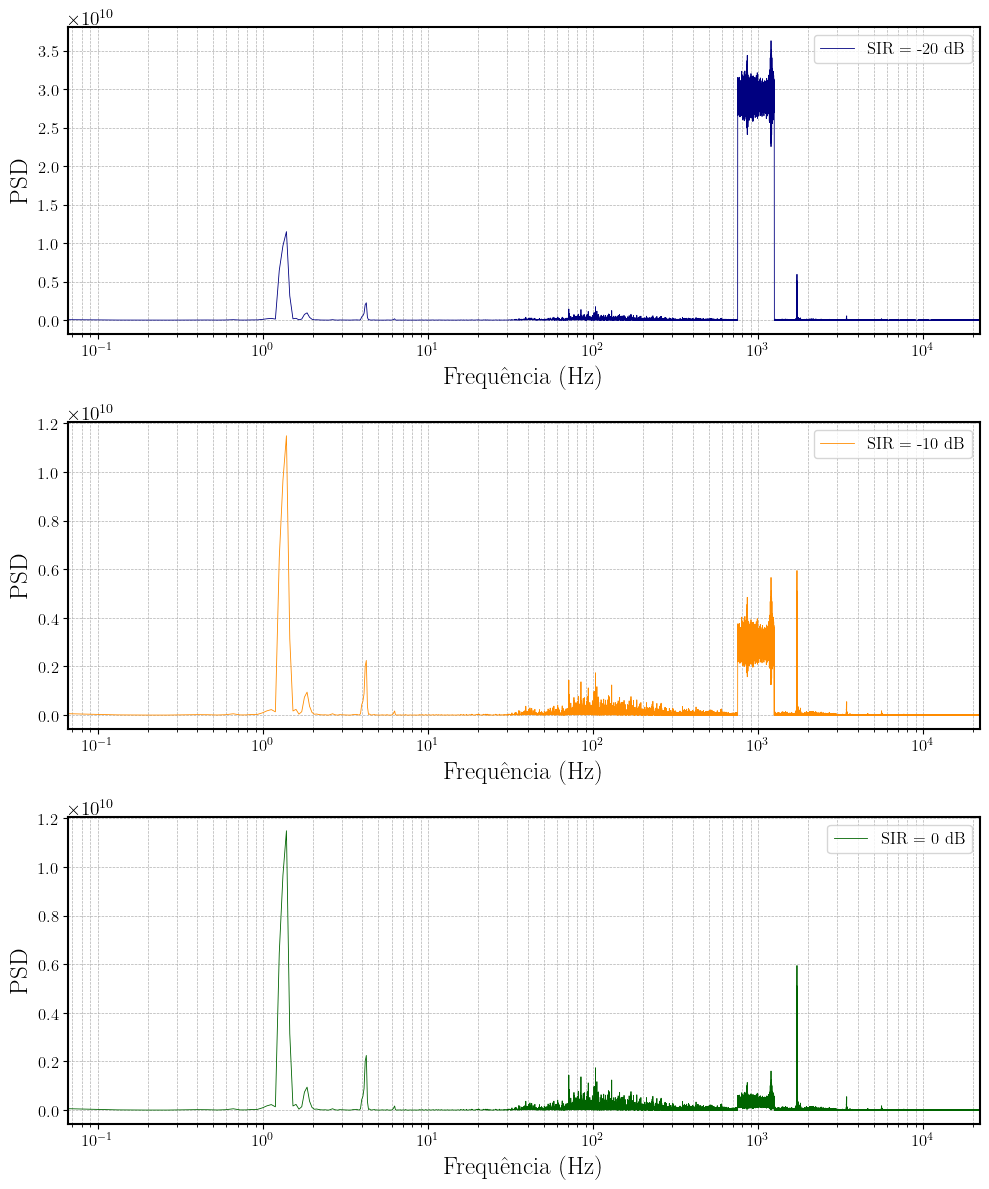

In [46]:
def rect(f0, b, fs, n):
    """ Retorna uma função retangular centrada em f0 com largura b num array de n pontos.
    Esta função também deve ser espelhada em torno da frequência de amostragem fs.
    """
    freqs = np.linspace(0, fs, n, endpoint=False)
    return np.where(np.abs(freqs - f0) <= b / 2, 1, 0) + np.where(np.abs(freqs - (fs - f0)) <= b / 2, 1, 0)



# função parametrizada pelo SIR (Signal-to-Interference Ratio)
def add_interference(sir_db, data, interference):
    """Adiciona um sinal interferente ao sinal original.
    
    Parameters
    ----------
    sir_db : float
        Relação sinal-interferência em dB.
    interference : ndarray
        Transformada de Fourier do sinal interferente.
    data : ndarray
        Transformada de Fourier do sinal original.
    
    Returns
    -------
    ndarray
        Sinal com interferência.
    """
    sir = 10**(sir_db / 10)
    power_data = np.sum(np.abs(data)**2)
    power_interference = np.sum(np.abs(interference)**2)
    interference = interference * np.sqrt(power_data / (power_interference * sir))
    return data + interference

# # SIR variável
# sir = 0

# # sinal de interferência (sinal retangular)
# rect_signal = rect(1000, 500, fs, n)

# # sinal com interferência
# interfered_data = add_interference(sir, f_hat, rect_signal)

# # PSD do sinal com interferência
# sxx_interf = np.abs(interfered_data)**2 / n

# # plotar PSD do sinal com interferência
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.semilogx(freqs[l], sxx_interf[l], linewidth=0.6, label='Sinal com interferência (SIR= {} dB)'.format(sir), color='green')
# ax.set_xlim(freqs[l[0]], freqs[l[-1]])
# ax.set_xlabel('Frequência (Hz)')
# ax.set_ylabel('Densidade Espectral de Potência')
# ax.grid(True, which='both', linewidth=0.5, linestyle='--')
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(loc='upper right', fontsize=12)
# plt.show()

# valores de SIR
sirs = [-20, -10, 0]
# cores diferentes para cada SIR
colors = ['navy', 'darkorange', 'darkgreen']

# subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# plotar PSD para cada SIR
for i, sir in enumerate(sirs):
    # sinal de interferência (sinal retangular)
    rect_signal = rect(1000, 500, fs, n)
    # sinal com interferência
    interfered_data = add_interference(sir, f_hat, rect_signal)
    # PSD
    sxx_interf = np.abs(interfered_data)**2 / n
    # plot PSD
    axs[i].semilogx(freqs[l], sxx_interf[l], linewidth=0.6, label='SIR = {} dB'.format(sir), color=colors[i])
    axs[i].set_xlim(freqs[l[0]], freqs[l[-1]])
    axs[i].set_xlabel('Frequência (Hz)')
    axs[i].set_ylabel('PSD')
    axs[i].grid(True, which='both', linewidth=0.5, linestyle='--')
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].legend(loc='upper right', fontsize=12)

fig.tight_layout()
# salvar como eps
plt.savefig('psd_plot_interference.eps', format='eps')
plt.show()



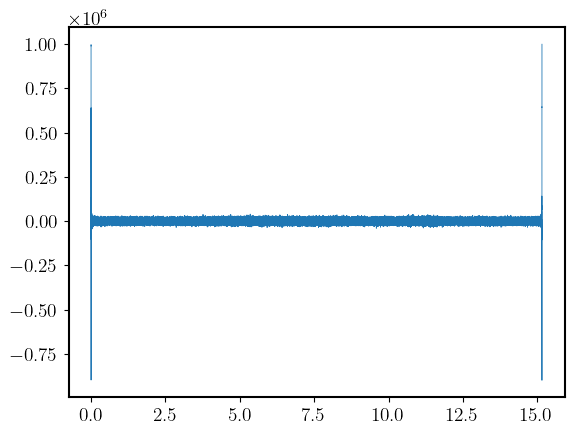

In [6]:
# transformada inversa de Fourier
interfered_signal = np.fft.ifft(interfered_data)
t = np.linspace(0, n / fs, n)
plt.plot(t, interfered_signal.real, linewidth=0.6, label='Sinal com interferência')

In [7]:
# tocando o sinal com interferência como áudio mono
Audio(interfered_signal.real, rate=fs)

# Parte 4

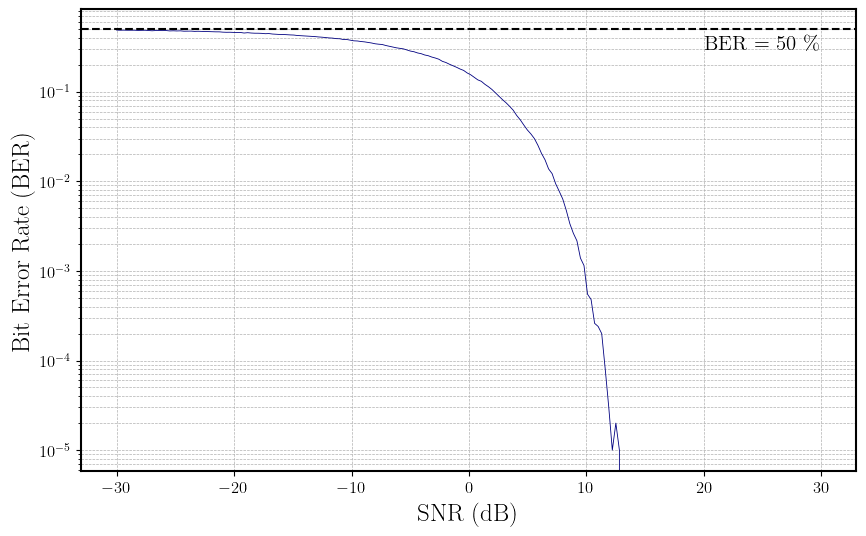

In [59]:
from numba import guvectorize, float64, int64

np.random.seed(123)

@guvectorize([(float64[:], int64, float64[:])], '(n),()->(n)')
def bit_error_rate(snr_dB, n, res):
    # algoritmo de Monte Carlo com n amostras
    for i in range(snr_dB.shape[0]):
        # Gerar uma sequência de bits aleatórios (-1 ou +1) com igual probabilidade
        s = np.random.choice(np.array([-1, 1]), n)
        # Gerar ruído gaussiano com desvio padrão proporcional ao SNR
        snr = 10**(snr_dB[i]/10)
        signal_variance = np.var(s)
        noise_std = (signal_variance/snr)**0.5
        noise = np.random.normal(0.0, noise_std, n)
        # sinal com ruido
        s_noise = s + noise
        # estimar o sinal a partir do sinal com ruído
        s_est = np.sign(s_noise)
        # contar o número de erros
        num_wrong = np.sum(s_est != s)
        res[i] = num_wrong/n

snr_dB = np.linspace(-30.0, 30.0, 200)
n = 100000
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogy(snr_dB, bit_error_rate(snr_dB, n), color='navy', linewidth=0.6)
ax.set_xlabel('SNR (dB)')
ax.set_ylabel('Bit Error Rate (BER)')
ax.grid(True, which='both', linewidth=0.5, linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axhline(0.5, color='black', linestyle='--')
ax.text(20, 0.3, 'BER = 50 \%', color='black', fontsize=15)
# salvar como eps
plt.savefig('ber_plot.eps', format='eps')
plt.show()